# 4.1 확률과 통계 학습을 위한 사전준비

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

# 4. 2. 확률

## 4. 2. 1. 수학적 확률

In [2]:
# 주사위 던지기 결과값을 배열로 저장
dice_data = np.array([1, 2, 3, 4, 5, 6])

print('숫자 하나만 무작위로 추출: ', np.random.choice(dice_data, 1))

숫자 하나만 무작위로 추출:  [5]


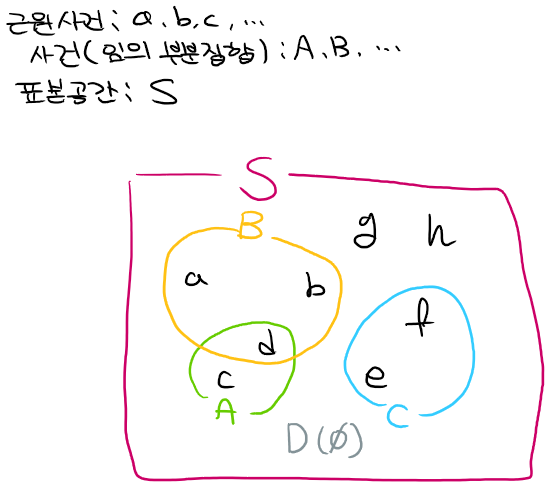

## 4. 2. 2. 통계적 확률

In [3]:
# 주사위를 1000회 던짐
calc_steps = 1000

# 1 ~ 6의 숫자 중에서 1000회 추출 시행
dice_rolls = np.random.choice(dice_data, calc_steps)

# 각 숫자가 추출되는 횟수의 비율을 계산
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    print(i, '가 나올 확률', p)

1 가 나올 확률 0.171
2 가 나올 확률 0.158
3 가 나올 확률 0.157
4 가 나올 확률 0.183
5 가 나올 확률 0.16
6 가 나올 확률 0.171


## 4. 2. 5. 베이즈 정리
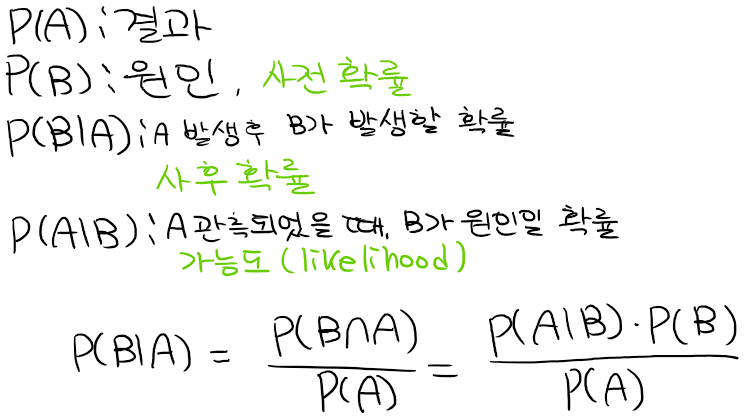

In [4]:
# 연습문제 4-1
coin_data = np.array([0, 1])
calc_steps = 1000

coin_toss = np.random.choice(coin_data, calc_steps)

for i in range(0, 2):
    p = len(coin_toss[coin_toss == i]) / calc_steps
    print(i, '가 나올 확률', p)

0 가 나올 확률 0.488
1 가 나올 확률 0.512


In [5]:
#연습문제 4-2
lottery_data = np.array([0, 1])
lottery_steps = 1000
lottery_proportion = np.array([0.9, 0.1])

lottery = np.random.choice(lottery_data, lottery_steps, p = lottery_proportion)

for i in range(0, 2):
    p = len(lottery[lottery == i]) / lottery_steps
    print(i, '가 나올 확률', p)
    
# A가 당첨되고 B가 당첨될 확률은?
A_lottery_proportion = np.array([(1000-100)/1000, 100/1000])
B_lottery_proportion = np.array([((1000-1)-(100-1))/(1000-1), (100-1)/(1000-1)])

print('A가 당첨되고 B가 당첨될 확률은 ', A_lottery_proportion[1] * B_lottery_proportion[1])

0 가 나올 확률 0.895
1 가 나올 확률 0.105
A가 당첨되고 B가 당첨될 확률은  0.009909909909909911


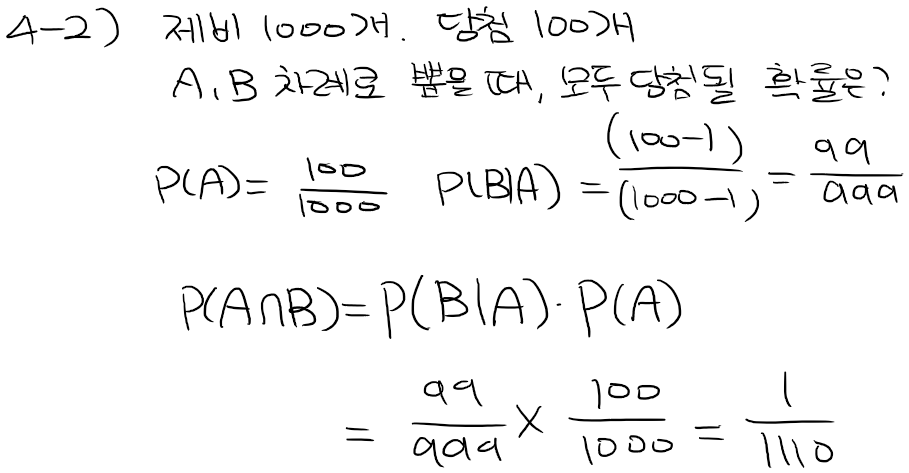

In [6]:
#연습문제 4-3
# 0: 음성, 1: 양성
p_x = np.array([0.999, 0.001])
p_x_test_x = np.array([0.01, 0.99])
p_not_x_test_x = np.array([0.97, 0.03])

p_test_x_x = (p_x_test_x[1] * p_x[1]) / ((p_x_test_x[1] * p_x[1]) + (p_not_x_test_x[1] * p_x[0]))
print(p_test_x_x)

0.03197674418604651


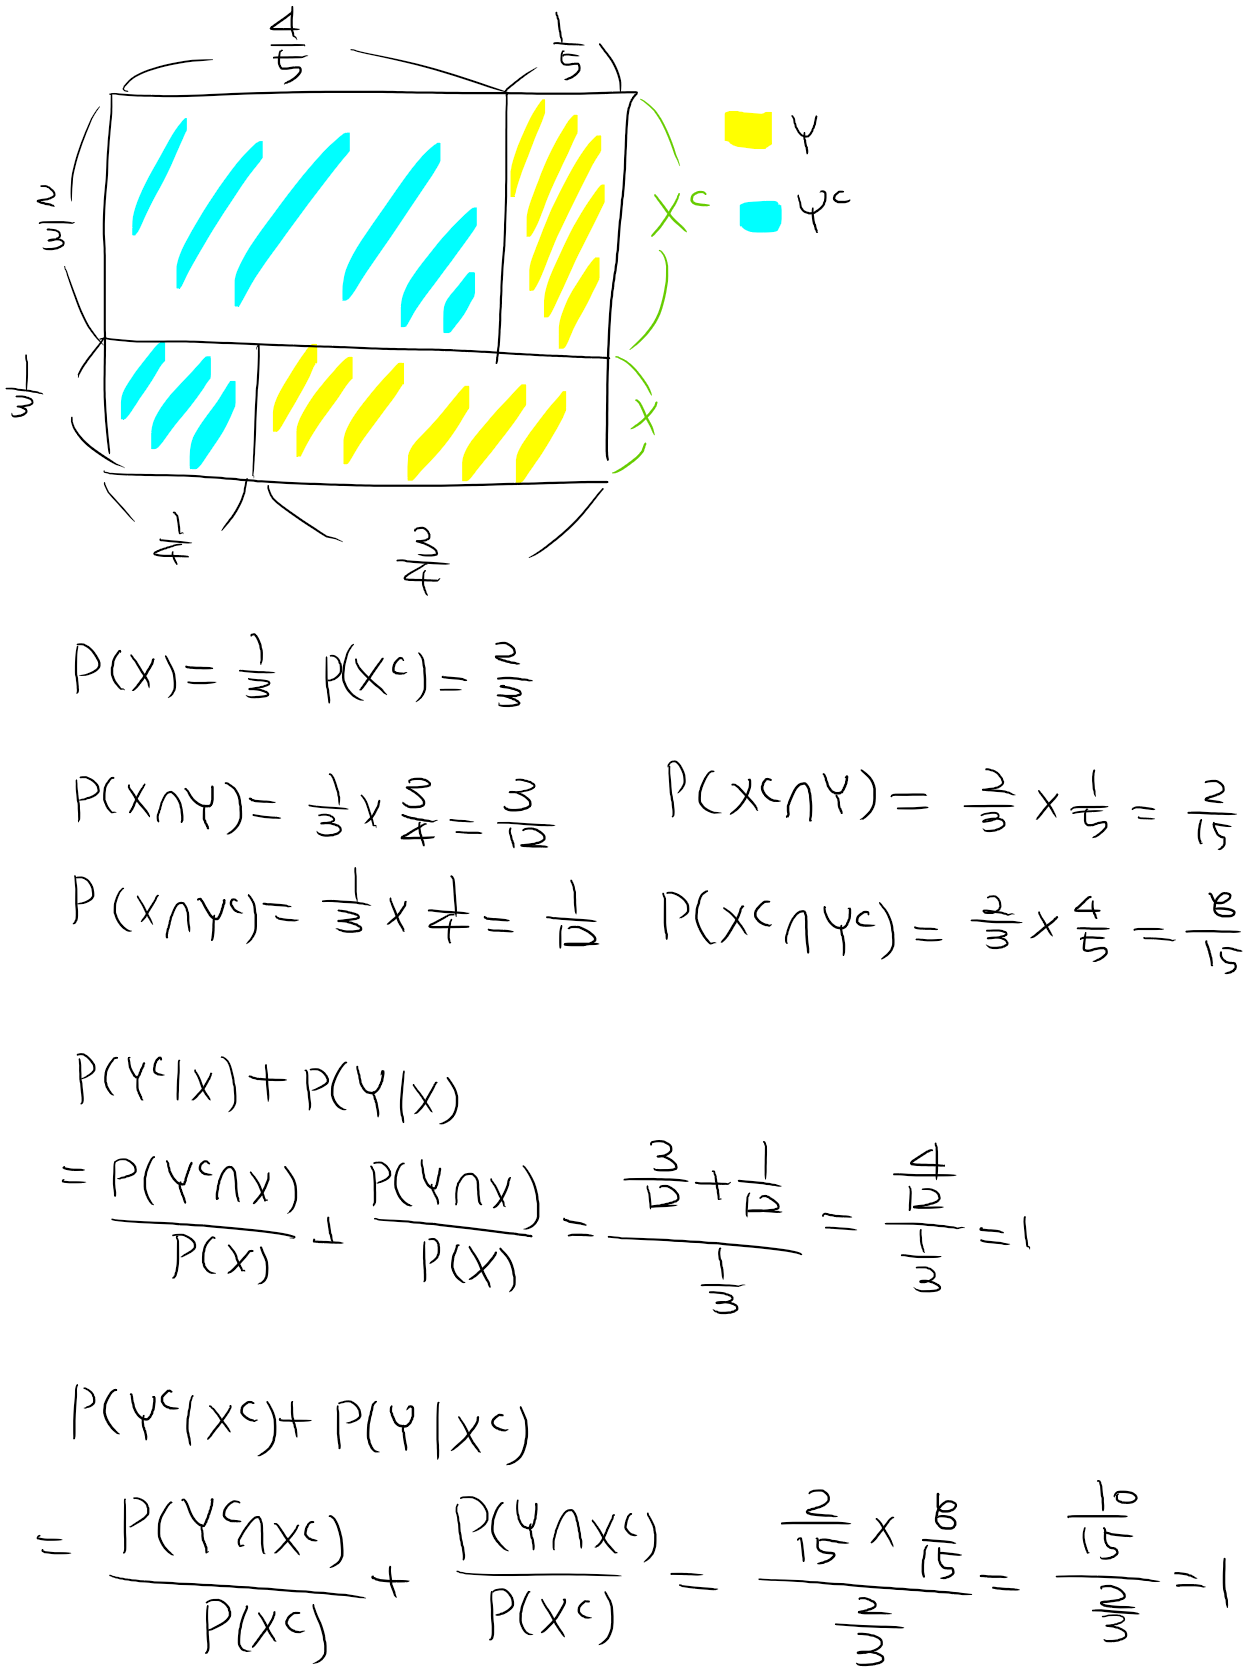

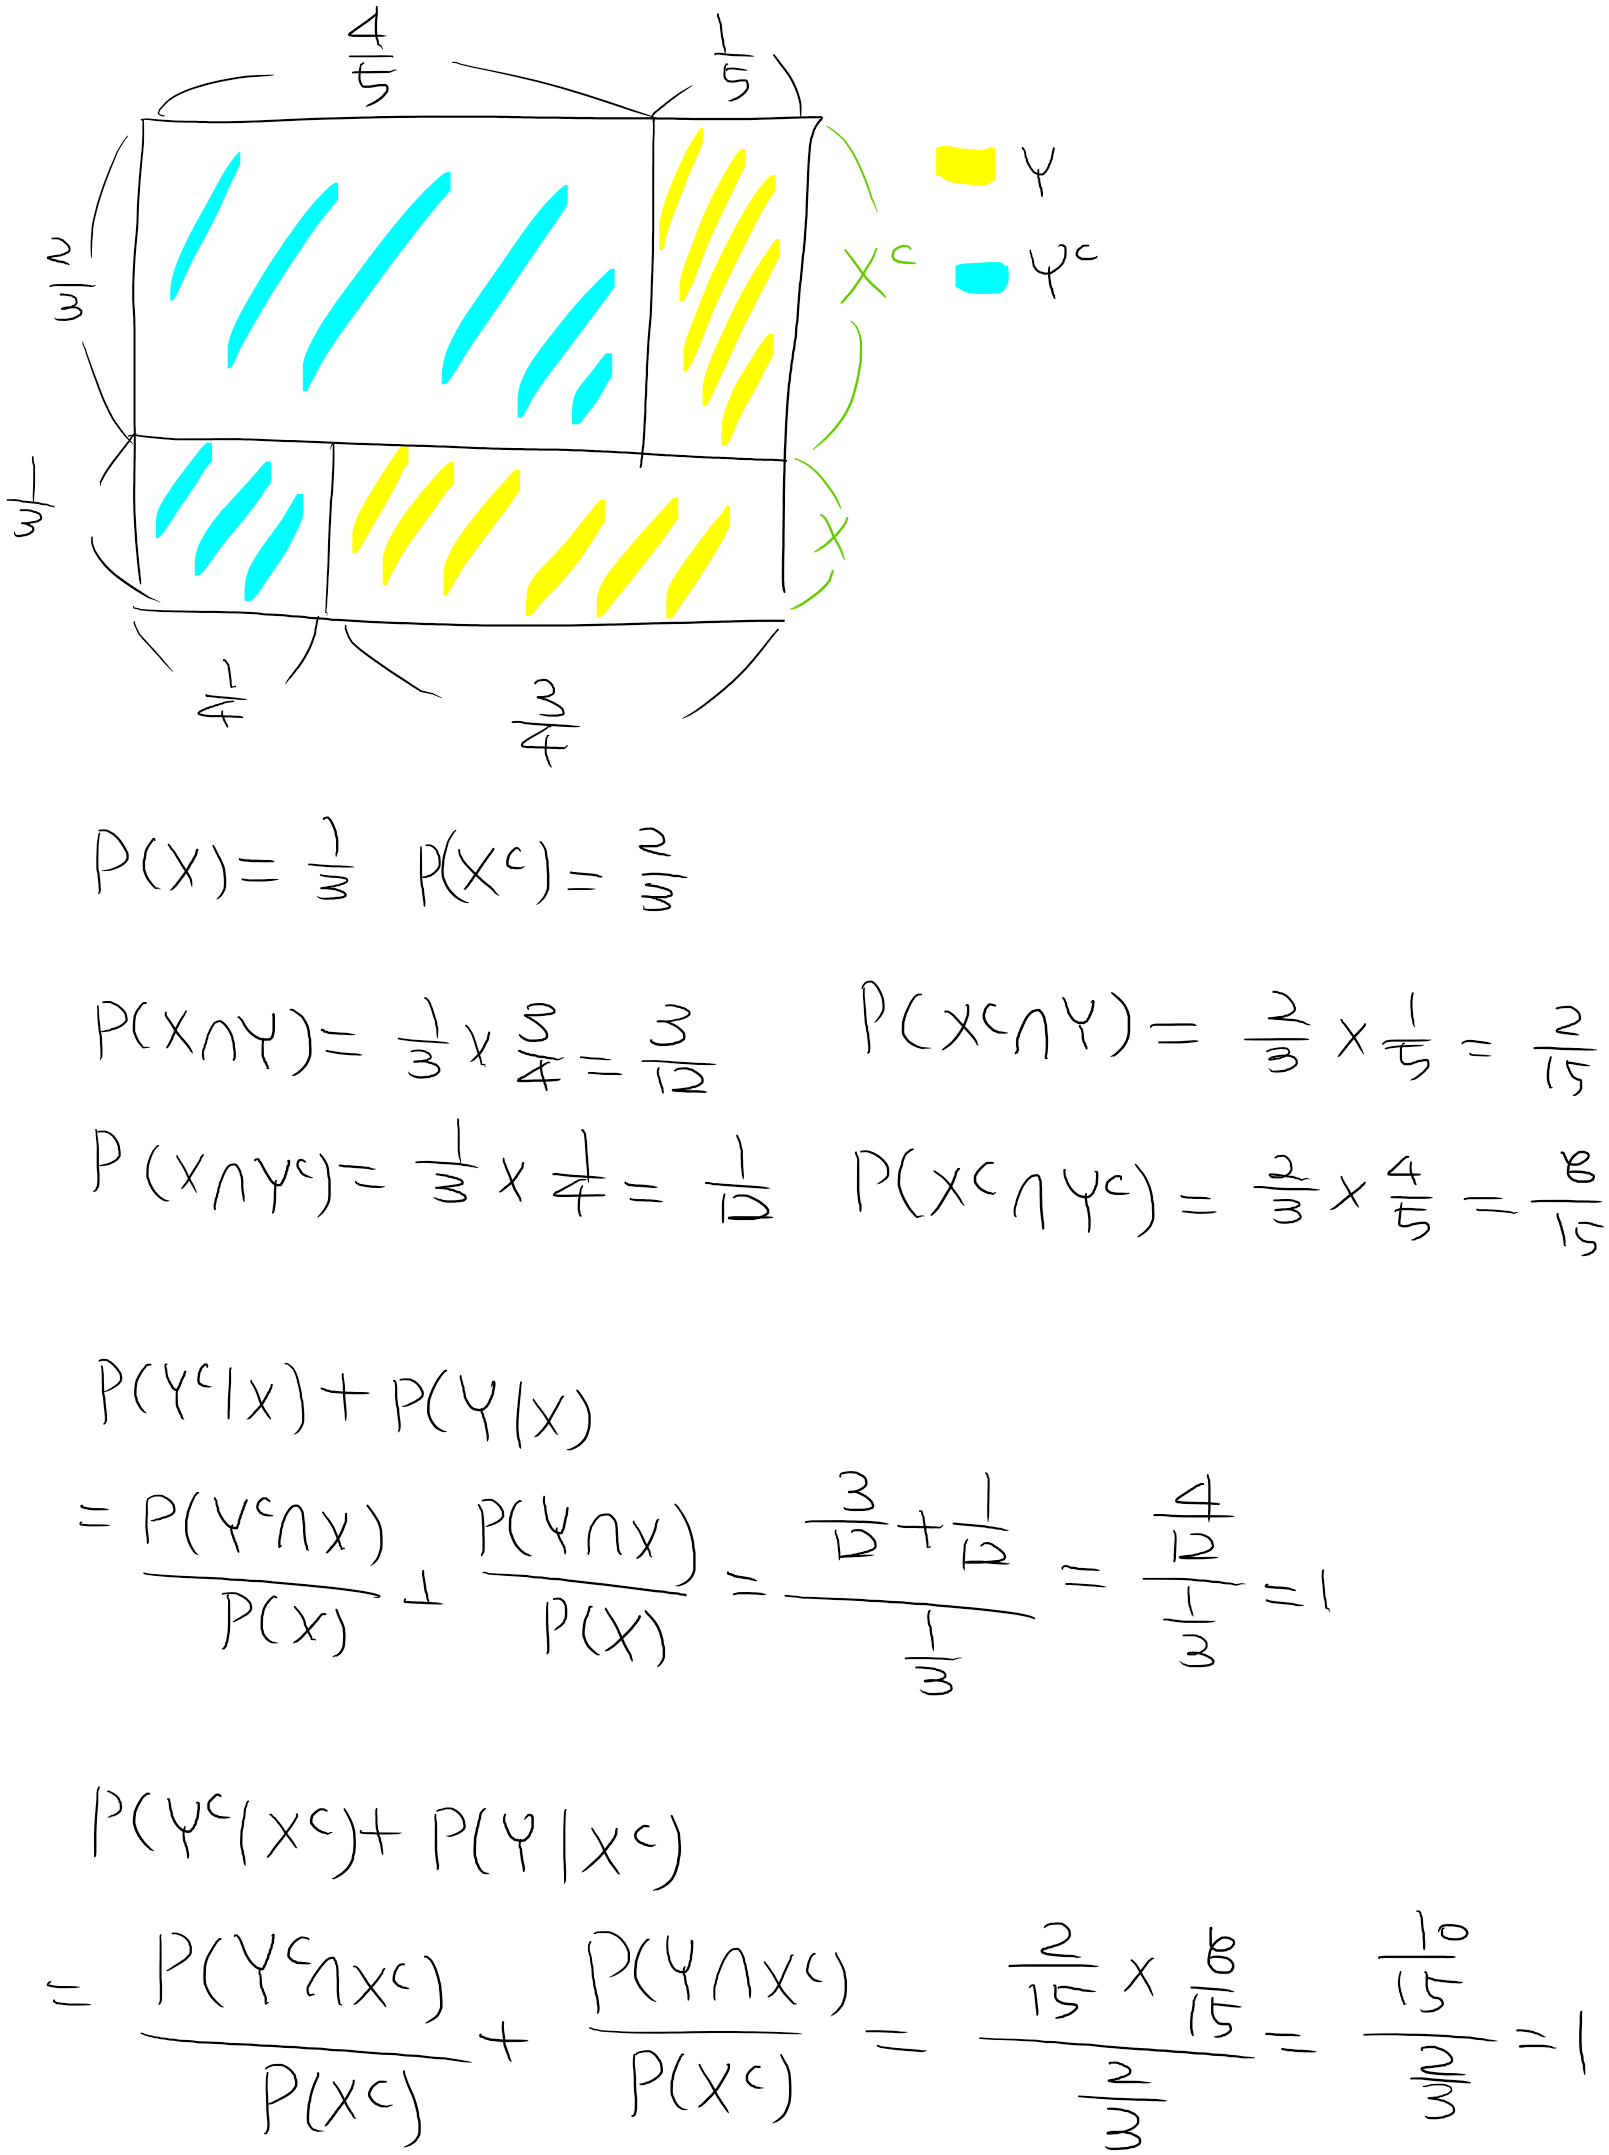

# 4. 3. 확률변수와 확률분포

## 4. 3. 1. 확률변수, 확률함수, 분포함수, 기댓값
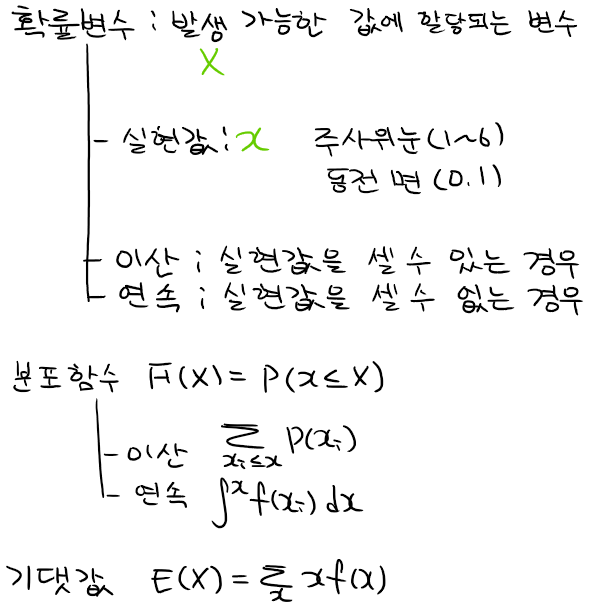

## 4. 3. 2. 다양한 분포함수

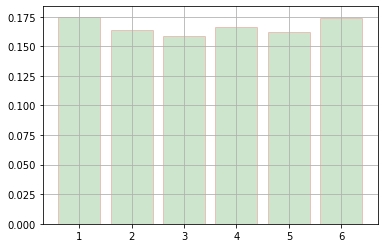

In [7]:
# 균등분포
# 주사위를 1000회 던짐
calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls == i]) / calc_steps)

plt.bar(dice_data, prob_data, alpha = 0.2, facecolor = 'green', edgecolor = 'red')
plt.grid(True)

In [8]:
# list와 array의 차이
x = np.array([1, 2, 3, 4, 5])
y = [6, 7, 8, 9, 10]

print(x * 2, y * 2)

[ 2  4  6  8 10] [6, 7, 8, 9, 10, 6, 7, 8, 9, 10]


In [9]:
# 내장형 append
a = []

for i in range(1, 11):
    a.append(i)
print('내장형', a)

# np.append는 차원이 같아야만 붙일 수 있다
b = []

for i in range(1, 11):
    b = np.append(b, i)
print('numpy', b)

내장형 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
numpy [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


0 가 나올 확률 0.625
1 가 나올 확률 0.375


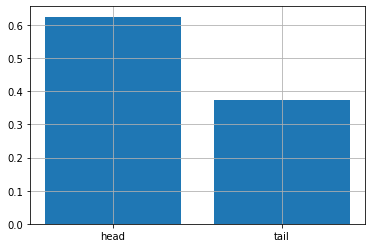

In [10]:
# 베르누이분포
# head: 0, tail: 1
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# unique로 유일한 값 추출
for i in np.unique(coin_data):
    p = len(coin_data[coin_data == i]) / len(coin_data)
    print(i, '가 나올 확률', p)
    prob_be_data = np.append(prob_be_data, p)

plt.bar([0, 1], prob_be_data, align = 'center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

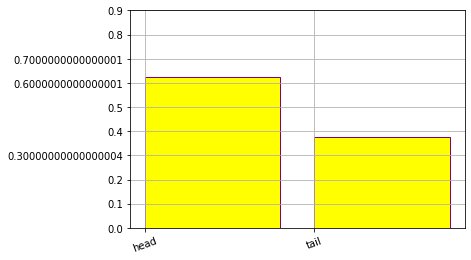

In [11]:
# align은 edge도 가능하다
# xticks는 x 좌표의 눈금을 꾸미는 것
plt.bar([0, 1], prob_be_data, align = 'edge', fc = 'yellow', ec = 'purple')  
plt.xticks([0, 1], ['head', 'tail'], rotation=20)
y_step = np.arange(0, 1, 0.1)
plt.yticks(y_step, y_step)
plt.grid(True)

In [12]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Call signatures::
    
        locs, labels = xticks()            # Get locations and labels
        xticks(ticks, [labels], **kwargs)  # Set locations and labels
    
    Parameters
    ----------
    ticks : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable xticks.
    
    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.
    
    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.
    
    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `

In [13]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

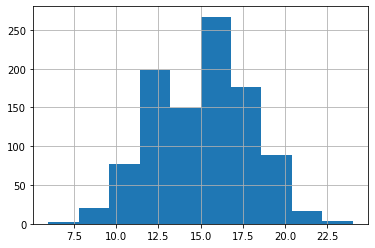

In [14]:
# 이항분포
np.random.seed(0)
# 시행횟수, 확률, 샘플수
# n회 시행하는 동안 확률 p로 발생하는 사건의 횟수를 반환
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

https://angeloyeo.github.io/2021/04/23/binomial_distribution.html
- 이항분포 그래프 설명 보기 좋음

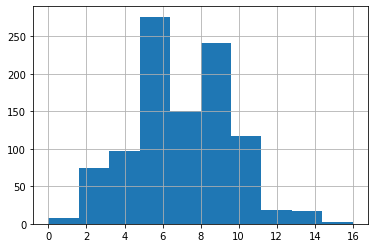

In [15]:
# 푸아송분포
# 사건이 발생하길 기대되는 횟수, 샘플수
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

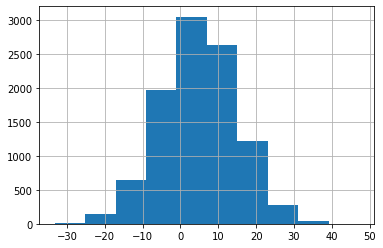

In [16]:
# 정규분포
# 평균, 표준편차, 샘플 수
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

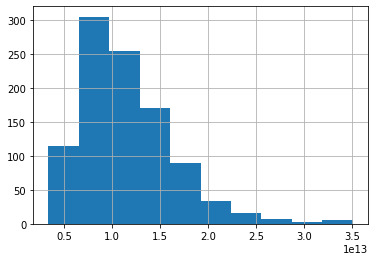

In [17]:
# 로그 정규분포
# 평균, 표준편차, 샘플 수
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

## 4. 3. 3. 커널 밀도함수

In [18]:
student_data_math = pd.read_csv('./chap3/student-mat.csv', sep = ';')
student_data_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


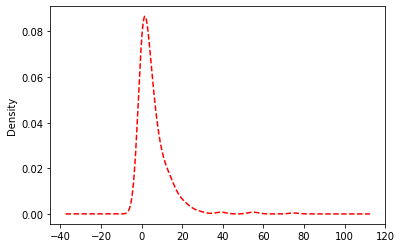

In [19]:
# 커널 밀도함수
student_data_math.absences.plot(kind = 'kde', style = 'r--')

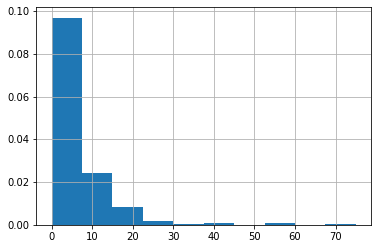

In [20]:
# 단순 히스토그램 density = True로 지정시, 확률로 표시
student_data_math.absences.hist(density = True)
plt.grid(True)

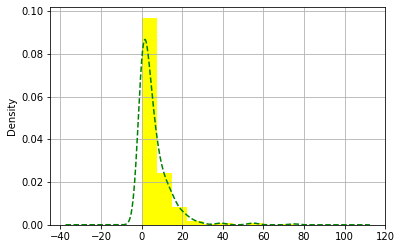

In [21]:
# 커널 밀도함수
student_data_math.absences.plot(kind = 'kde', style = 'g--')
# 단순 히스토그램 density = True로 지정시, 확률로 표시
student_data_math.absences.hist(density = True, color = 'yellow')
plt.grid(True)

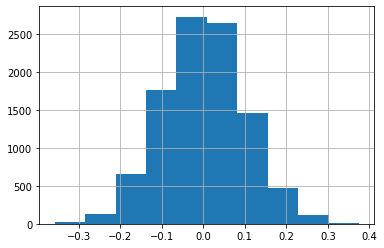

In [22]:
# 연습문제 4-4
x_sampling = [np.random.normal(0, 1, 100).mean() for i in range(10000)]
plt.hist(x_sampling)
plt.grid(True)

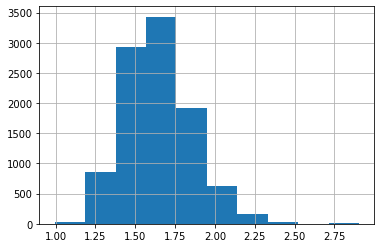

In [23]:
# 연습문제 4-5
x_sampling = [np.random.lognormal(0, 1, 100).mean() for i in range(10000)]
plt.hist(x_sampling)
plt.grid(True)

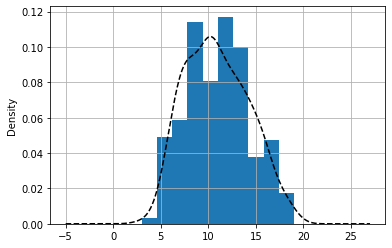

In [24]:
# 연습문제 4-6

# 커널 밀도함수
student_data_math.G1.plot(kind = 'kde', style = 'k--')
# 단순 히스토그램 density = True로 지정시, 확률로 표시
student_data_math.G1.hist(density = True)
plt.grid(True)

# 4. 4. 심화학습: 다차원확률분포

## 4. 4. 1. 결합확률분포와 주변확률분포

## 4. 4. 2. 조건부 확률 함수와 조건부 기댓값

## 4. 4. 3. 독립과 연속분포

In [25]:
# 2차원 정규분포 시각화
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# 데이터 설정
x, y = np.mgrid[10:100:2, 10:100:2]

# 메모리 초기화 하지 않으면 쓰레기값이 들어가있다
pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y

In [26]:
# 찾아보니 x와 y의 차원을 똑같이 맞춰주고 싶을 때, 격자를 만들 때 유용하다고 한다.
# 알겠는데, 그래서 왜 좋은지 잘 모르겠다.. 나중에 더 공부해야지.
# 근데 세로가 45개인건 오케이, 가로는 왜 45야? 정방행렬 맞춰줄 필요는 없는데.. 왜지?
help(np.mgrid)

Help on MGridClass in module numpy.lib.index_tricks object:

class MGridClass(nd_grid)
 |  `nd_grid` instance which returns a dense multi-dimensional "meshgrid".
 |  
 |  An instance of `numpy.lib.index_tricks.nd_grid` which returns an dense
 |  (or fleshed out) mesh-grid when indexed, so that each returned argument
 |  has the same shape.  The dimensions and number of the output arrays are
 |  equal to the number of indexing dimensions.  If the step length is not a
 |  complex number, then the stop is not inclusive.
 |  
 |  However, if the step length is a **complex number** (e.g. 5j), then
 |  the integer part of its magnitude is interpreted as specifying the
 |  number of points to create between the start and stop values, where
 |  the stop value **is inclusive**.
 |  
 |  Returns
 |  ----------
 |  mesh-grid `ndarrays` all of the same dimensions
 |  
 |  See Also
 |  --------
 |  numpy.lib.index_tricks.nd_grid : class of `ogrid` and `mgrid` objects
 |  ogrid : like mgrid but retu

In [27]:
# 메모리 초기화 하지 않으면 쓰레기값이 들어가있다
p = np.empty(x.shape + (2, ))
p

array([[[9.253e-312, 9.253e-312],
        [7.639e-313, 0.000e+000],
        [3.715e-321,        nan],
        ...,
        [4.456e-312,        nan],
        [4.435e-312,        nan],
        [4.414e-312,        nan]],

       [[4.393e-312,        nan],
        [4.371e-312,        nan],
        [4.350e-312,        nan],
        ...,
        [3.501e-312,        nan],
        [3.480e-312,        nan],
        [3.459e-312,        nan]],

       [[3.438e-312,        nan],
        [3.416e-312,        nan],
        [3.395e-312,        nan],
        ...,
        [0.000e+000, 0.000e+000],
        [0.000e+000, 0.000e+000],
        [0.000e+000, 0.000e+000]],

       ...,

       [[0.000e+000, 0.000e+000],
        [0.000e+000, 0.000e+000],
        [0.000e+000, 0.000e+000],
        ...,
        [0.000e+000, 0.000e+000],
        [0.000e+000, 0.000e+000],
        [0.000e+000, 0.000e+000]],

       [[0.000e+000, 0.000e+000],
        [0.000e+000, 0.000e+000],
        [0.000e+000, 0.000e+000],
        .

In [28]:
# 다차원정규분포
# 각 변수의 평균과 분산공분산행렬 설정
# x와 y의 각 평균이 50과 0이고, [[100, 0], [0, 100]]은 x와 y의 공분산행렬입니다
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 확률밀도함수
z = rv.pdf(pos)

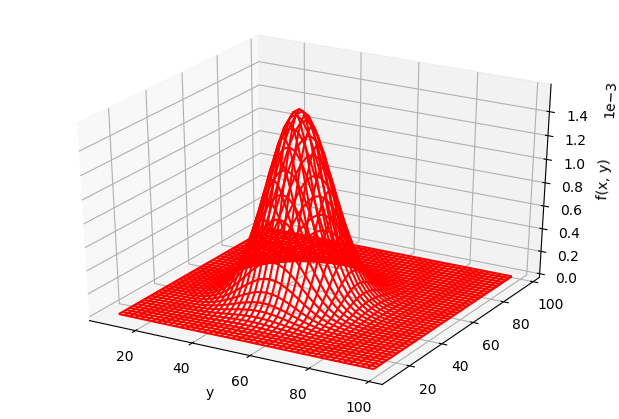

In [29]:
fig = plt.figure(dpi = 100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z, color = 'red')

# x, y, z 레이블 설정
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_zlabel('f(x, y)')

# z축 단위 변경, sci는 지수 표시를 의미, axis로 축 설정
# scilimits = (n, m)는 n부터 m 사이 밖의 값은 지수 표기 의미
# scilimits = (0, 0): 모두 지수로 표기한다는 의미
ax.ticklabel_format(style = 'sci', axis = 'z', scilimits = (0, 0))

# 4. 5. 추론 통계학

## 4. 5. 1. 대수 법칙

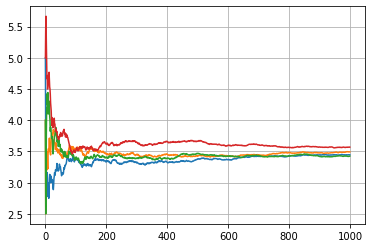

In [30]:
# 대수의 법칙
# 계산(주사위 던지기) 횟수
calc_times = 1000

# 주사위
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 4개의 선 생성
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

## 4. 5. 2. 중심 극한 정리

In [31]:
# 중심 극한 정리
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
#     numaber_cnt = np.arange(1, N + 1) * 1.0
    
    mean_array = np.array([])
    
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum() * 1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
    
    plt.hist(mean_array)
    plt.grid(True)

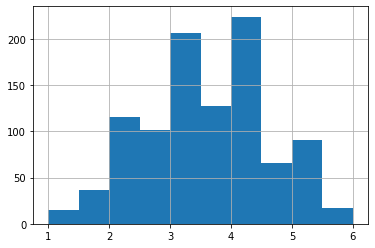

In [32]:
function_central_theory(3)

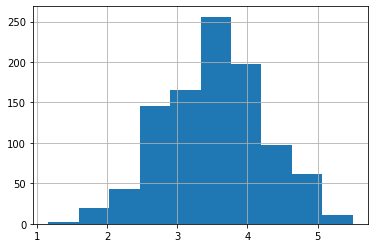

In [33]:
function_central_theory(6)

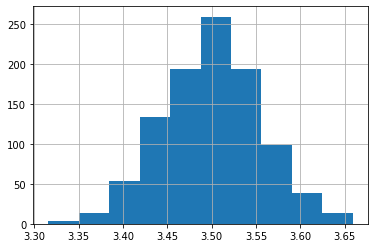

In [34]:
function_central_theory(10 ** 3)

## 4. 5. 3. 표본분포

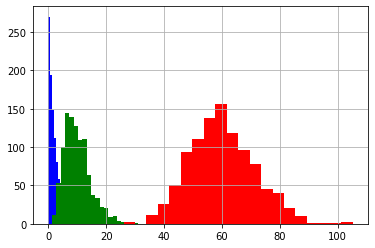

In [35]:
# 카이 제곱 분포
# 자유도 2, 10, 60을 따르는 카이제곱분포가 생성하는 난수의 히스토그램
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color = c)
    plt.grid(True)

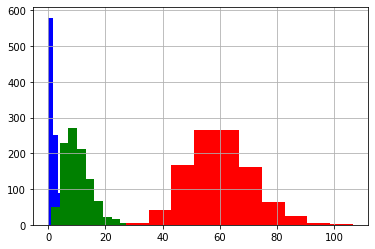

In [36]:
# 카이 제곱 분포
# 자유도 2, 10, 60을 따르는 카이제곱분포가 생성하는 난수의 히스토그램
# plt.hist안에 있는 10은 bins인가?
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 10, color = c)
    plt.grid(True)

In [37]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or seque

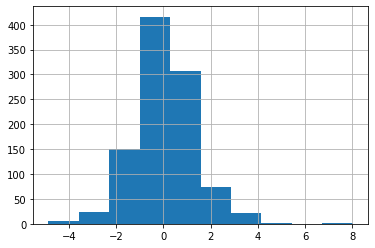

In [38]:
# 스튜던트 t 분포
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

In [39]:
help(np.random.standard_t)

Help on built-in function standard_t:

standard_t(...) method of mtrand.RandomState instance
    standard_t(df, size=None)
    
    Draw samples from a standard Student's t distribution with `df` degrees
    of freedom.
    
    A special case of the hyperbolic distribution.  As `df` gets
    large, the result resembles that of the standard normal
    distribution (`standard_normal`).
    
    Parameters
    ----------
    df : float or array_like of floats
        Degrees of freedom, should be > 0.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``df`` is a scalar.  Otherwise,
        ``np.array(df).size`` samples are drawn.
    
    Returns
    -------
    out : ndarray or scalar
        Drawn samples from the parameterized standard Student's t distribution.
    
    Notes
    -----
    The probability density

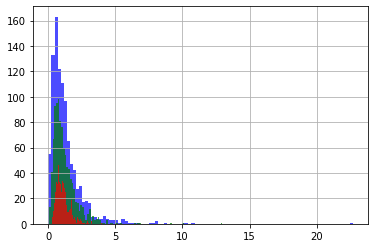

In [40]:
# F 분포
for df, c in zip([(6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color = c, alpha = 0.7)
    plt.grid(True)

In [41]:
help(np.random.f)

Help on built-in function f:

f(...) method of mtrand.RandomState instance
    f(dfnum, dfden, size=None)
    
    Draw samples from an F distribution.
    
    Samples are drawn from an F distribution with specified parameters,
    `dfnum` (degrees of freedom in numerator) and `dfden` (degrees of
    freedom in denominator), where both parameters should be greater than
    zero.
    
    The random variate of the F distribution (also known as the
    Fisher distribution) is a continuous probability distribution
    that arises in ANOVA tests, and is the ratio of two chi-square
    variates.
    
    Parameters
    ----------
    dfnum : float or array_like of floats
        Degrees of freedom in numerator, should be > 0.
    dfden : float or array_like of float
        Degrees of freedom in denominator, should be > 0.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``

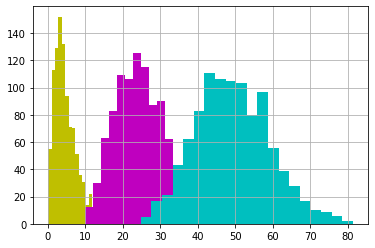

In [42]:
# 연습문제 4-7
# 자유도 5, 25, 50인 카이제곱분포를 따르는 난수를 각 1000개씩 생성하고 히스토그램을 그리세요

for df, c in zip([5, 25, 50], 'ymc'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color = c)
    plt.grid(True)

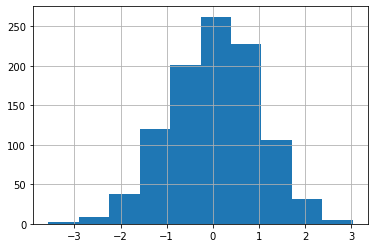

In [43]:
# 연습문제 4-8
# 자유도 100인 t 분포를 따르는 난수를 각 1000개씩 생성하고 히스토그램을 그리세요

x = np.random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

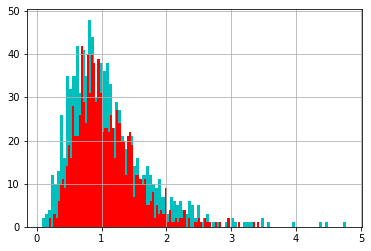

In [44]:
# 연습문제 4-9
# 자유도 (10, 30), (20, 25)인 F 분포를 따르는 난수를 각 1000개씩 생성하고 히스토그램을 그리세요

for df, c in zip([(10, 30), (20, 25)], 'cr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color = c)
    plt.grid(True)

# 4. 6. 통계적 추정

### 연습문제 4-10
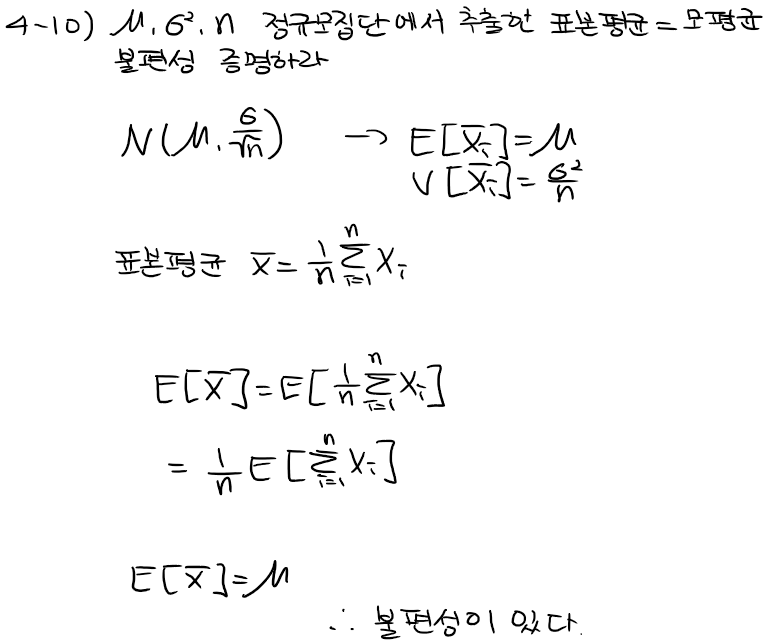

### 연습문제 4-11
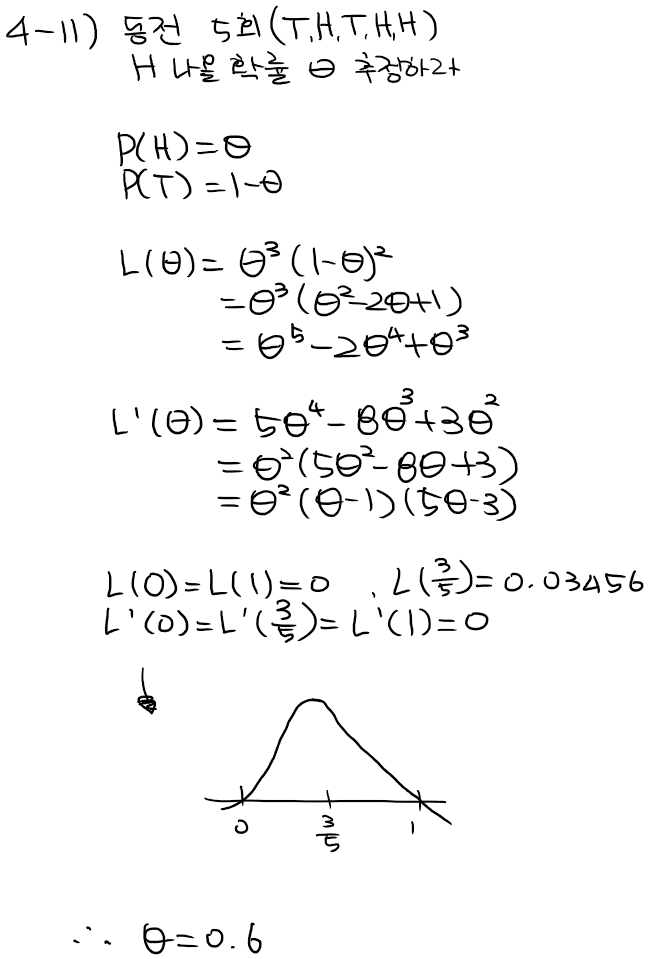

In [45]:
# 연습문제 4-12

# 4. 7. 통계적 검정

In [46]:
# 수학 성적 데이터 읽어 오기
student_data_math = pd.read_csv('./chap3/student-mat.csv', sep = ';')

# 포루투갈어 성적 데이터 읽어 오기
student_data_por = pd.read_csv('./chap3/student-por.csv', sep = ';')

# 결합
student_data_merge = pd.merge(student_data_math,
                              student_data_por,
                              on = ['school', 'sex', 'age', 'address', 'famsize',
                                    'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
                                    'nursery', 'internet'],
                              suffixes = ('_math', '_por'))

print('G1 수학 성적 평균: ', student_data_merge.G1_math.mean())
print('G1 포르투갈어 성적 평균: ', student_data_merge.G1_por.mean())

G1 수학 성적 평균:  10.861256544502618
G1 포르투갈어 성적 평균:  12.112565445026178


## 4. 7. 1. 검정

In [47]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p값 = ', p)

p값 =  1.6536555217100788e-16


## 4. 7. 3. 빅데이터 검정

In [48]:
# 연습문제 4-13
# 3장에서 이용한 데이터에서 수학과 포르투갈어 성적(G2) 평균에 차이가 있다고 할 수 있을까요? G3는 어떤가요?

# G2 평균 비교
print('G2 수학 성적 평균: ', student_data_merge.G2_math.mean())
print('G2 포르투갈어 성적 평균: ', student_data_merge.G2_por.mean())

t2, p2 = stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print('G2 p값: ', p2)

print('\n')

# G3 평균 비교
print('G3 수학 성적 평균: ', student_data_merge.G3_math.mean())
print('G3 포르투갈어 성적 평균: ', student_data_merge.G3_por.mean())

t3, p3 = stats.ttest_rel(student_data_merge.G3_math, student_data_merge.G3_por)
print('G3 p값: ', p3)

print('p2와 p3 모두 매우 작으므로, 수학과 포르투갈어 성적은 G2와 G3 모두 유의한 차이가 있습니다')

G2 수학 성적 평균:  10.712041884816754
G2 포르투갈어 성적 평균:  12.238219895287958
G2 p값:  4.0622824801348043e-19


G3 수학 성적 평균:  10.387434554973822
G3 포르투갈어 성적 평균:  12.515706806282722
G3 p값:  5.5614921136883854e-21
p2와 p3 모두 매우 작으므로, 수학과 포르투갈어 성적은 G2와 G3 모두 유의한 차이가 있습니다


In [49]:
# 4장 종합문제
# stduent_data_merge를 이용해 아래의 질문에 답하세요
# 1. 각 결석일 수는 차이가 있다고 할 수 있을까요?

In [50]:
# 4장 종합문제
# stduent_data_merge를 이용해 아래의 질문에 답하세요
# 2. 각 공부시간은 어떨까요?